# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Köse

Student name: İsmail Deha
    
ID: 2072544

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2072544 # place a random seed
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [59 51 58 46 62 60 71 55 63 75]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


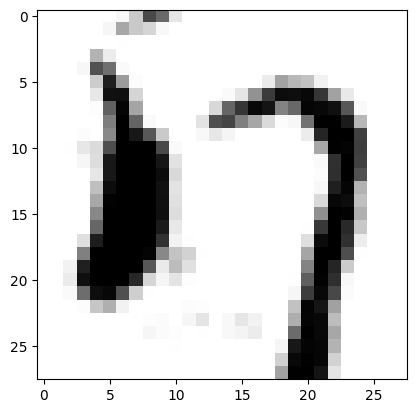

LABEL: 5
INPUT:


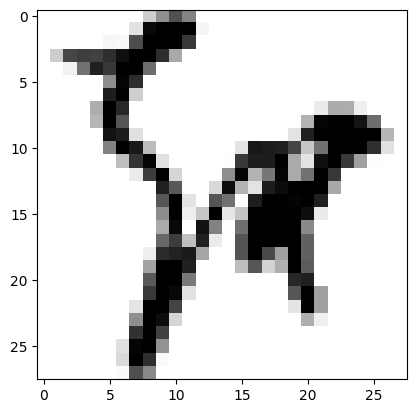

LABEL: 9
INPUT:


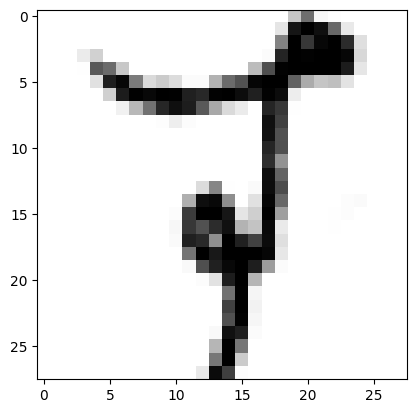

LABEL: 2
INPUT:


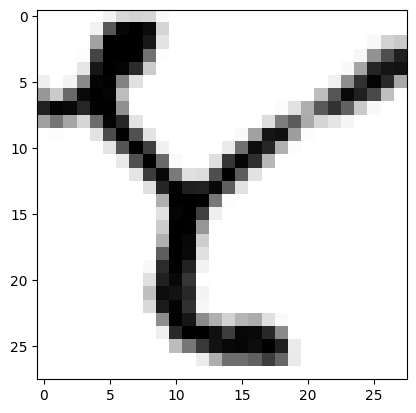

LABEL: 9


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV
import pandas as pd

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10]}

#train linear SVM

clf =GridSearchCV(SVC(kernel="linear"),parameters,cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:", clf.best_params_)


print("Score with best parameters:", clf.best_score_)


print("All scores on the grid:", pd.DataFrame(clf.cv_results_))


RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 0.01}
Score with best parameters: 0.7216666666666667
All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.082330      0.004342         0.020953        0.000301    0.01   
1       0.084350      0.001749         0.019037        0.000052     0.1   
2       0.083851      0.001487         0.019525        0.000523       1   
3       0.080930      0.001310         0.019519        0.001492      10   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}               0.74           0.700000           0.706667   
1   {'C': 0.1}               0.72           0.706667           0.713333   
2     {'C': 1}               0.72           0.706667           0.713333   
3    {'C': 10}               0.72           0.706667           0.713333   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.740000         0.721667  

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

clf =GridSearchCV(SVC(kernel="poly",degree=2),parameters,cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:", clf.best_params_)


print("Score with best parameters:", clf.best_score_)


print("All scores on the grid:", pd.DataFrame(clf.cv_results_))


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 1}
Score with best parameters: 0.7483333333333333
All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.116014      0.000716         0.022971        0.000832    0.01   
1       0.095984      0.003593         0.019931        0.000555    0.01   
2       0.099487      0.001768         0.020009        0.001253    0.01   
3       0.107746      0.001017         0.021739        0.000431     0.1   
4       0.102150      0.002240         0.019990        0.000994     0.1   
5       0.102976      0.002648         0.020294        0.001961     0.1   
6       0.099990      0.005336         0.020503        0.000368       1   
7       0.102813      0.001877         0.019820        0.000488       1   
8       0.104044      0.002637         0.020195        0.002473       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01, 'ga

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3

clf =GridSearchCV(SVC(kernel="poly",degree=degree),parameters,cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=',degree,' KERNEL')

print("Best parameters set found:", clf.best_params_)


print("Score with best parameters:", clf.best_score_)


print("All scores on the grid:", pd.DataFrame(clf.cv_results_))


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1}
Score with best parameters: 0.7150000000000001
All scores on the grid:    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.126595      0.002095         0.026692        0.002154    0.01   
1       0.110874      0.002729         0.021169        0.001649    0.01   
2       0.108041      0.001636         0.018571        0.000588    0.01   
3       0.111586      0.000745         0.021882        0.000733     0.1   
4       0.109242      0.002287         0.019046        0.000777     0.1   
5       0.108801      0.001203         0.019251        0.000430     0.1   
6       0.105370      0.000921         0.020295        0.000731       1   
7       0.108117      0.002302         0.018882        0.000553       1   
8       0.108207      0.000872         0.018742        0.000450       1   

  param_gamma                      params  split0_test_score  \
0        0.01  {'C': 0.01,

## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with rbf kernel

clf =GridSearchCV(SVC(kernel="rbf"),parameters,cv=4)
clf.fit(X_train, y_train)

print ('RESULTS FOR RBF KERNEL')

print("Best parameters set found:", clf.best_params_)


print("Score with best parameters:", clf.best_score_)


print("All scores on the grid:", pd.DataFrame(clf.cv_results_)) #C büyüdükçe marjin küçülür#

RESULTS FOR RBF KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01}
Score with best parameters: 0.7816666666666666
All scores on the grid:     mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.122547      0.000911         0.043473        0.000878     0.1   
1        0.126871      0.002866         0.045088        0.002259     0.1   
2        0.132656      0.001437         0.044722        0.001586     0.1   
3        0.140437      0.003096         0.046510        0.003216     0.1   
4        0.111196      0.000248         0.045579        0.003443       1   
5        0.125889      0.002191         0.040989        0.001880       1   
6        0.133119      0.000738         0.043564        0.000337       1   
7        0.137546      0.001529         0.045708        0.005131       1   
8        0.083885      0.001512         0.039640        0.000671      10   
9        0.126709      0.000274         0.042574        0.002730      10   
10       0.134439 

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

RBF have the best accuracy rate. Then comes polynomial which degree is equal to two as second accuracy rate but have the largest margin.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
parameters = {'C': [10],'gamma':[0.01]}

clf =GridSearchCV(SVC(kernel="rbf"),parameters,cv=4)
best_SVM=clf.fit(X_train, y_train)

# (error is 1 - svm.score)
best_SVM.predict(X_train)
best_SVM.predict(X_test)
training_error= 1 - best_SVM.score(X_train,y_train)
test_error=1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.166750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


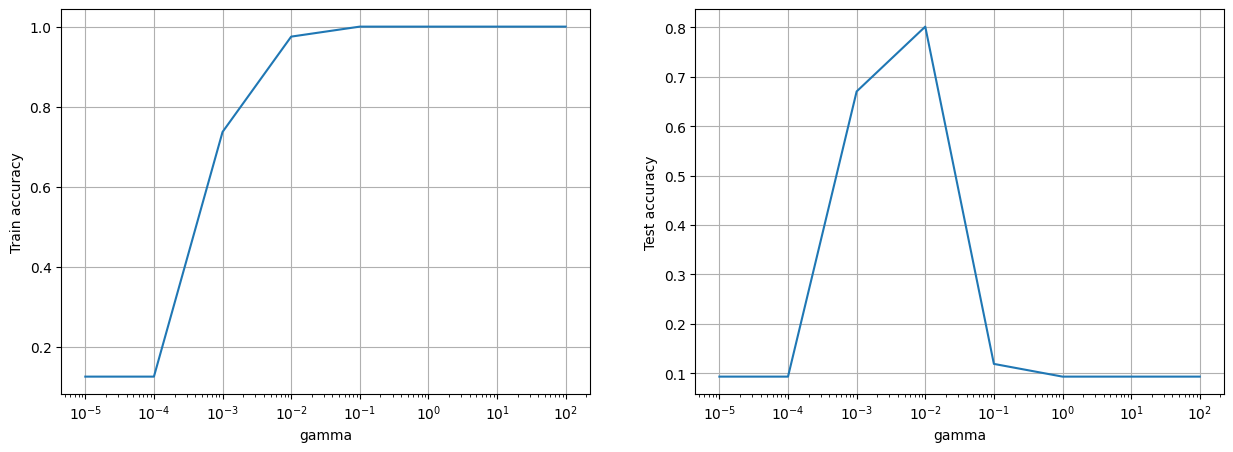

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

for gamma in gamma_values:
    parameters = {'C': [1],'gamma':[gamma]}
    clf =GridSearchCV(SVC(kernel="rbf"),parameters,cv=4)
    best_SVM=clf.fit(X_train, y_train)
    
    best_SVM.predict(X_train)
    best_SVM.predict(X_test)
    
    train_acc_list.append(best_SVM.score(X_train,y_train))
    test_acc_list.append(best_SVM.score(X_test,y_test))

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The accuracy is getting increase when gamma is getting increase. According the test results, it reaches the best accuracy at gamma=10^-1. Then when we came the test accuray, t reaches the best accuracy at gamma=10^-2. When observe the test graph, the accuracy getting decrease after the peak value. While the comparing two graph, when test accuracy get decrease after one value of gamma, the test accuracy is same after that gamma value. Cause of that situation is there was a the overfitting. Accuracy is high for the some exact values, when we have changed those values, distribution have changed also. So, model learns according to the exact distribution, and when distribution change, model is getting false prediction because it not be able to adapt to new distribution. 

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [191 213 210 207 192 188 208 189 209 193]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV

parameters = {'C': [10],'gamma':[0.01]}

clf =GridSearchCV(SVC(kernel="rbf"),parameters,cv=4)
best_SVM=clf.fit(X_train, y_train)

# (error is 1 - svm.score)
best_SVM.predict(X_train)
best_SVM.predict(X_test)
training_error= 1 - best_SVM.score(X_train,y_train)
test_error=1 - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.110155


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C = 1*10**10)
logreg.fit(X_train, y_train)

# (error is 1 - svm.score)
logreg.predict(X_train)
logreg.predict(X_test)
training_error= 1 - logreg.score(X_train,y_train)
test_error=1 - logreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.294741


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
logreg = linear_model.LogisticRegression(C = 1)
logreg.fit(X_train, y_train)

# (error is 1 - svm.score)
logreg.predict(X_train)
logreg.predict(X_test)
training_error= 1 - logreg.score(X_train,y_train)
test_error=1 - logreg.score(X_test,y_test)


print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

C:\Users\dehak\anaconda3\envs\Run\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best regularized logistic regression training error: 0.001500
Best regularized logistic regression test error: 0.259397


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression


-Answers-

- Increasing the training data size is supporting us to improving effects of support vectors. Thus, we can get the values which are more accurate.

m = 600, Best SVM training error: 0.000000 - Best SVM test error: 0.166750
m = 2000, Best SVM training error: 0.000000 - Best SVM test error: 0.110155


- Both results of Logistic Regression with large C and small C have more test error than test error of best_SVM. We can say that with 2000 training data points, best_SVM results are better.


## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


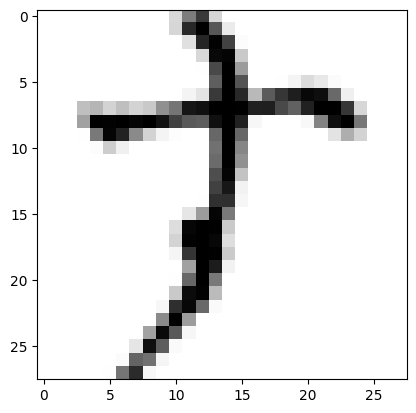

LABEL: 2


In [19]:
LR_prediction = logreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

for i,y,l,s in zip(range(y_test.shape[0]), LR_prediction, SVM_prediction, y_test): 
    if l != y and s == y:
        plot_input(X_test,y_test,i)
        break

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5809 5787 5790 5793 5808 5812 5792 5811 5791 5807]

 Confusion matrix SVM  
 
 [[5430    9    4   38  128   45    7   55   68   25]
 [  13 5077  102   57  118   12  155    3  132  118]
 [   0   99 4920  120   57   20  325   28  150   71]
 [  13   55  127 5321   39   92   22   33   78   13]
 [ 176  146  116   69 4982   12  101   30  104   72]
 [  51   90  127  171   46 5139   54   24   98   12]
 [   9  103  268   42  149   11 5077   71   49   13]
 [  75   21   51   39  163   29   88 5234   89   22]
 [  23  142   95   90   15   37  165    8 5189   27]
 [  17  137  173   36  107    6   21   17   51 5242]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.01 0.02 0.01 0.   0.01 0.01 0.  ]
 [0.   0.88 0.02 0.01 0.02 0.   0.03 0.   0.02 0.02]
 [0.   0.02 0.85 0.02 0.01 0.   0.06 0.   0.03 0.01]
 [0.   0.01 0.02 0.92 0.01 0.02 0.   0.01 0.01 0.  ]
 [0.03 0.03 0.02 0.01 0.86 0.   0.02 0.01 0.02 0.01]
 [0.01 0.02 0.02 0.03 0.01 0.88 0.01 0.   0.0

In [21]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX
confusion_SVM = confusion_matrix(y_test, SVM_prediction, normalize="true")
print("Normalize Confusion matrix SVM: \n", confusion_SVM)

confusion_LR = confusion_matrix(y_test, LR_prediction,normalize="true")
print("Normalize Confusion matrix LR: \n", confusion_LR)


Normalize Confusion matrix SVM: 
 [[0.93 0.   0.   0.01 0.02 0.01 0.   0.01 0.01 0.  ]
 [0.   0.88 0.02 0.01 0.02 0.   0.03 0.   0.02 0.02]
 [0.   0.02 0.85 0.02 0.01 0.   0.06 0.   0.03 0.01]
 [0.   0.01 0.02 0.92 0.01 0.02 0.   0.01 0.01 0.  ]
 [0.03 0.03 0.02 0.01 0.86 0.   0.02 0.01 0.02 0.01]
 [0.01 0.02 0.02 0.03 0.01 0.88 0.01 0.   0.02 0.  ]
 [0.   0.02 0.05 0.01 0.03 0.   0.88 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.03 0.   0.02 0.9  0.02 0.  ]
 [0.   0.02 0.02 0.02 0.   0.01 0.03 0.   0.9  0.  ]
 [0.   0.02 0.03 0.01 0.02 0.   0.   0.   0.01 0.9 ]]
Normalize Confusion matrix LR: 
 [[0.84 0.   0.   0.02 0.04 0.03 0.   0.03 0.01 0.02]
 [0.   0.71 0.06 0.03 0.04 0.01 0.05 0.01 0.04 0.04]
 [0.   0.08 0.63 0.03 0.04 0.01 0.09 0.02 0.06 0.04]
 [0.   0.02 0.03 0.78 0.03 0.06 0.01 0.01 0.05 0.01]
 [0.04 0.06 0.05 0.04 0.68 0.01 0.03 0.03 0.02 0.05]
 [0.02 0.03 0.04 0.04 0.01 0.79 0.02 0.02 0.03 0.01]
 [0.   0.05 0.08 0.02 0.04 0.02 0.74 0.02 0.03 0.01]
 [0.02 0.01 0.02 0.02 0.03 0.03

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


- Mostly classes have high accuracy because it is easier to recognize them and their images are quite unique from each other. When it was compared the accuracy of SVM and LR, SVM has higher accuracy.Therefore, SVM is better choice for classification on our dataset.

SVM;
o : 0.93 ki : 0.88 su : 0.85 tsu: 0.92 na : 0.86 ha : 0.88 ma : 0.88 ya : 0.9 re : 0:9 wo : 0.9

LR;

o : 0.84 ki : 0.71 su : 0.63 tsu: 0.78 na : 0.68 ha : 0.79 ma : 0.74 ya : 0.79 re : 0:7 wo : 0.73

